In [2]:
import itertools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [3]:
df = pd.read_csv('airquality.csv')
df = df[df.Ozone.notna()]
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
5,6,28.0,NaN,14.9,66,5,6


In [4]:
x = df['Ozone'].values
y = df['Temp'].values

x, y = list(zip(*sorted(zip(x,y))))
x, y = np.array(x).reshape(-1,1),np.array(y)

In [5]:
# Initialise a single decision tree stump
basemodel = DecisionTreeRegressor(max_depth=1)

# Fit the stump on the entire data
basemodel.fit(x,y)

# Predict on the entire data
y_pred = basemodel.predict(x)

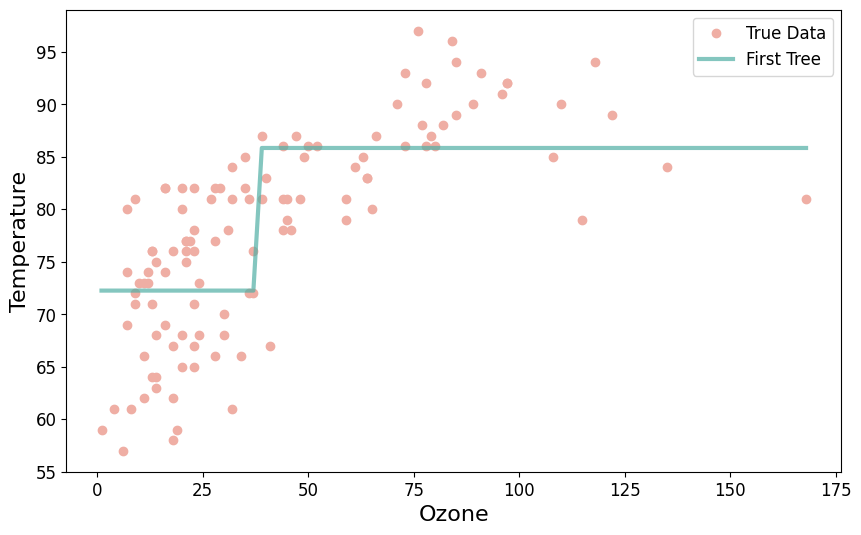

In [6]:
# Helper code to plot the data
plt.figure(figsize=(10,6))
xrange = np.linspace(x.min(),x.max(),100)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()

In [7]:
### edTest(test_first_residuals) ###

# Calculate the error residuals
residuals = y - y_pred

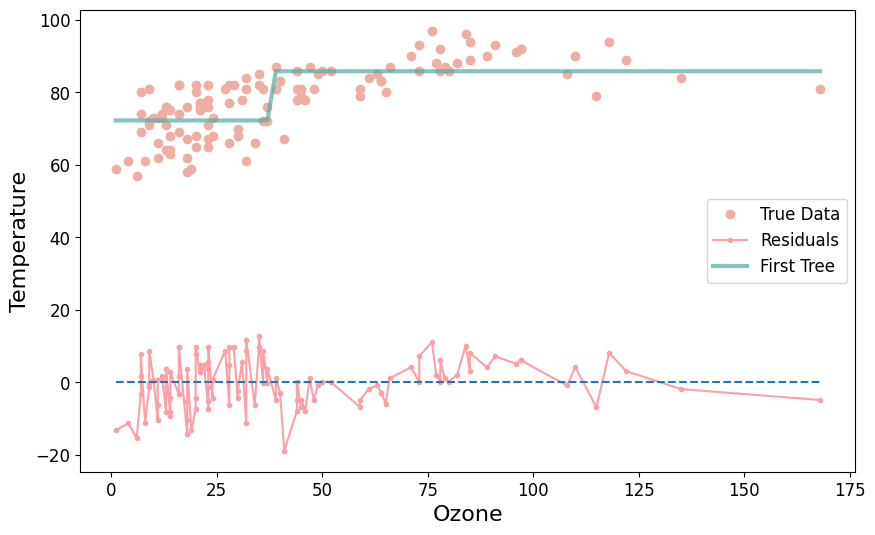

In [8]:
# Helper code to plot the data with the residuals
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [9]:
### edTest(test_fitted_residuals) ###

# Initialise a tree stump
dtr = DecisionTreeRegressor(max_depth=1)

# Fit the tree stump on the residuals
dtr.fit(x,residuals)

# Predict on the entire data
y_pred_residuals = dtr.predict(x)

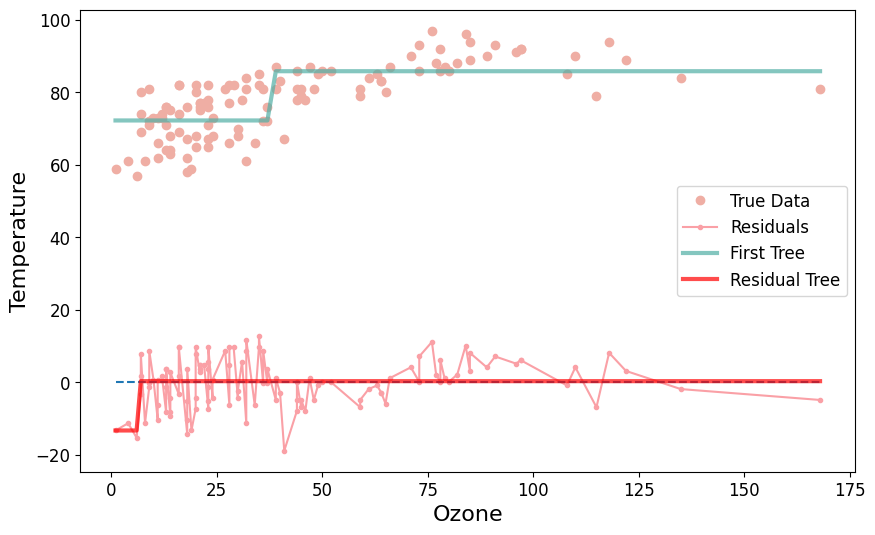

In [10]:
# Helper code to add the fit of the residuals to the original plot 
plt.figure(figsize=(10,6))

plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [11]:
### edTest(test_new_pred) ###

# Set a lambda value and compute the predictions based on 
# the residuals
lambda_ = 0.1
y_pred_new = y_pred + lambda_ * y_pred_residuals

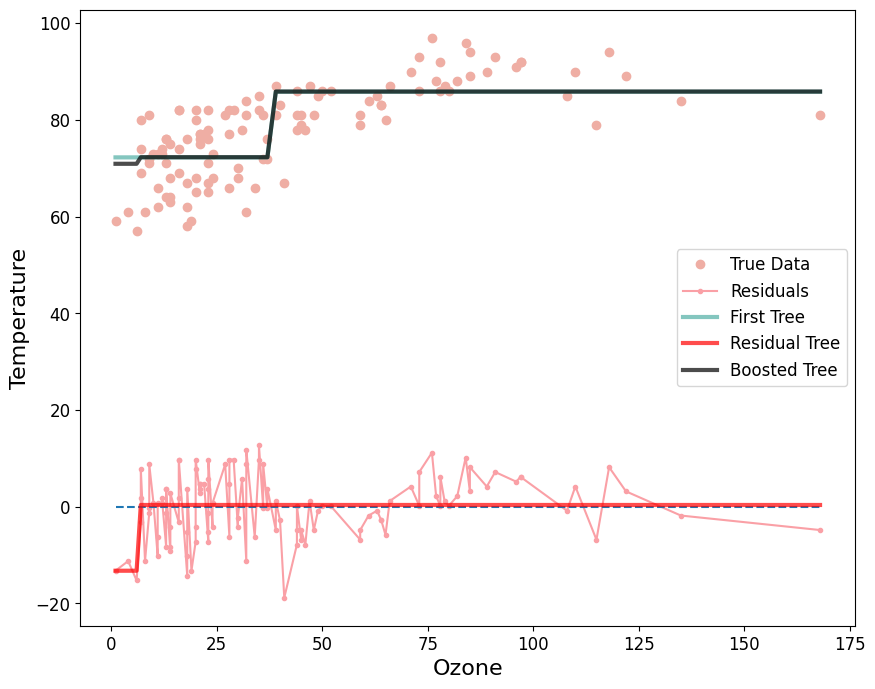

In [12]:
# Helper code to plot the boosted tree
plt.figure(figsize=(10,8))
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.plot(x,y_pred_new,alpha=0.7,linewidth=3,color='k', label='Boosted Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [13]:
# Split the data into train and test sets with train size as 0.8 
# and random_state as 102
# The default value for shuffle is True for train_test_split, so the ordering we 
# did above is not a problem. 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)

In [14]:
### edTest(test_boosting) ###

# Set a learning rate
l_rate = 0.1

# Initialise a Boosting model using sklearn's boosting model 
# Use 1000 estimators, depth of 1 and learning rate as defined above
boosted_model  = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=l_rate)

# Fit on the train data
boosted_model.fit(x_train, y_train)

# Predict on the test data
y_pred = boosted_model.predict(x_test)

In [15]:
# Specify the number of bootstraps
num_bootstraps = 30

# Specify the maximum depth of the decision tree
max_depth = 100

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
# Set max_samples as .8 and random_state as 3
model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=max_depth),
                          n_estimators=num_bootstraps,
                          max_samples=0.8,
                          random_state=3)
                        

# Fit the model on the train data
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=100),
                 max_samples=0.8, n_estimators=30, random_state=3)

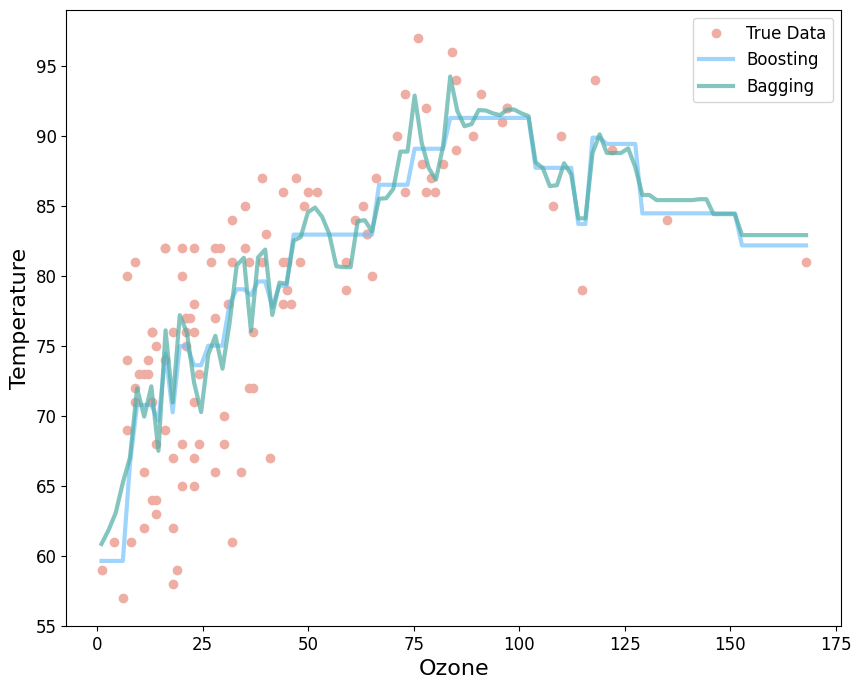

In [16]:
# Helper code to plot the bagging and boosting model predictions
plt.figure(figsize=(10,8))
xrange = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y_pred_boost = boosted_model.predict(xrange)
y_pred_bag = model.predict(xrange)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(xrange,y_pred_boost,alpha=0.7,linewidth=3,color='#77c2fc', label='Boosting')
plt.plot(xrange,y_pred_bag,alpha=0.7,linewidth=3,color='#50AEA4', label='Bagging')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()

In [17]:
### edTest(test_mse) ###

# Compute the MSE of the Boosting model prediction on the test data
boost_mse = mean_squared_error(y_test, y_pred)
print("The MSE of the Boosting model is", boost_mse)

The MSE of the Boosting model is 50.84602835649065


In [18]:
# Compute the MSE of the Bagging model prediction on the test data
bag_mse = mean_squared_error(y_test, model.predict(x_test))
print("The MSE of the Bagging model is", bag_mse)

The MSE of the Bagging model is 55.01029065728144
